In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np



from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
def distribution (rev):
    data=df.loc[rev]
    print(len(data))
    print(data.iloc[0,[8,12,10,14]])
    plt.figure(figsize=(15,10))
    
    plt.subplot(3,2,1)
    w= np.ones_like(data['overall'])/float(len(data['overall']))
    plt.hist(data['overall'],weights=w)
    plt.title('overall score')
    plt.grid()
    
    plt.subplot(3,2,2)
    w= np.ones_like(data.length_review)/float(len(data.length_review))
    plt.hist(data['length_review'],weights=w)
    plt.grid()
    plt.title('length of reviews')
    
    plt.subplot(3,2,5)
    w= np.ones_like(data.sentiment_pos)/float(len(data.sentiment_pos))
    plt.hist(data['sentiment_pos'],weights=w)
    plt.grid()
    plt.title('positiveness')
    
    plt.subplot(3,2,6)
    w= np.ones_like(data.sentiment_neg)/float(len(data.sentiment_neg))
    plt.hist(data['sentiment_neg'],weights=w)
    plt.grid()
    plt.title('negativeness')
    
    plt.subplot(3,2,3)
    w= np.ones_like(data.helpfulness.dropna())/float(len(data.helpfulness.dropna()))
    plt.hist(data['helpfulness'].dropna(),weights=w)
    plt.grid()
    plt.title('helpfulness')
    
    plt.subplot(3,2,4)
    w= np.ones_like(data.year)/float(len(data.year))
    plt.hist(data['year'],weights=w)
    plt.grid()
    plt.title('year')
    
    plt

import itertools
def plot_correlation_matrix(cm, classes,title='Correlation matrix', cmap=plt.cm.RdBu):
    normalize=False
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.clim(-1,1)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             
np.set_printoptions(precision=2)

def corr (x,y,c):
    p.circle(X[x],X[y],color=c,alpha=0.5)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p


In [3]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("electronics_meta_sentiment.pickle","rb")
df = pickle.load(pickle_off)


In [4]:
df=df[df.year>2012]
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'year',
       'length_review', 'title', 'brand', 'price', 'sub_category_0',
       'sub_category_1', 'sales_category', 'sales_rank', 'score',
       'sentiment_com', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu'],
      dtype='object')

In [5]:
l=[]
for i in df.index:
    if df.helpful[i][1]==0:
        l.append(None)
    else:
        l.append(df.helpful[i][0]/df.helpful[i][1])
df['helpfulness']=l
del df['helpful']
del df['unixReviewTime']
df['sales_rank']=df['sales_rank'].replace(0, np.nan)

In [6]:
df=df.set_index('asin')

In [7]:
df.columns

Index(['reviewerID', 'reviewerName', 'reviewText', 'overall', 'summary',
       'reviewTime', 'year', 'length_review', 'title', 'brand', 'price',
       'sub_category_0', 'sub_category_1', 'sales_category', 'sales_rank',
       'score', 'sentiment_com', 'sentiment_pos', 'sentiment_neg',
       'sentiment_neu', 'helpfulness'],
      dtype='object')

In [8]:
products=df.index.unique()
len(products)

53924

In [31]:
n=list(map(lambda x:len(df.loc[x]),products))

In [32]:
count=pd.DataFrame(n)
count.index=products
count.columns=['n']
count=count.sort_values('n',ascending=False)

In [38]:
count.head(10)

,n
asin,
B007WTAJTO,4414
B00DR0PDNE,3798
B003ES5ZUU,3230
B009SYZ8OC,2538
B00BGGDVOO,2103
B003ELYQGG,2049
B002WE6D44,1859
B002V88HFE,1822
B005HMKKH4,1579


In [39]:
p=count.index.values[4]
X=df.loc[p,['overall','helpfulness','length_review','sentiment_pos','sentiment_neg','sentiment_com']]
X.head()

,overall,helpfulness,length_review,sentiment_pos,sentiment_neg,sentiment_com
asin,,,,,,
B00BGGDVOO,5.0,NaN,64,0.169,0.000,0.8906
B00BGGDVOO,3.0,NaN,305,0.147,0.100,0.9607
B00BGGDVOO,5.0,NaN,143,0.192,0.024,0.9655
B00BGGDVOO,5.0,NaN,128,0.083,0.055,0.6685
B00BGGDVOO,4.0,NaN,157,0.106,0.120,-0.5384


2103
title             Roku 3 Streaming Media Player
sub_category_1               Television & Video
price                                     99.97
sales_rank                                  NaN
Name: B00BGGDVOO, dtype: object


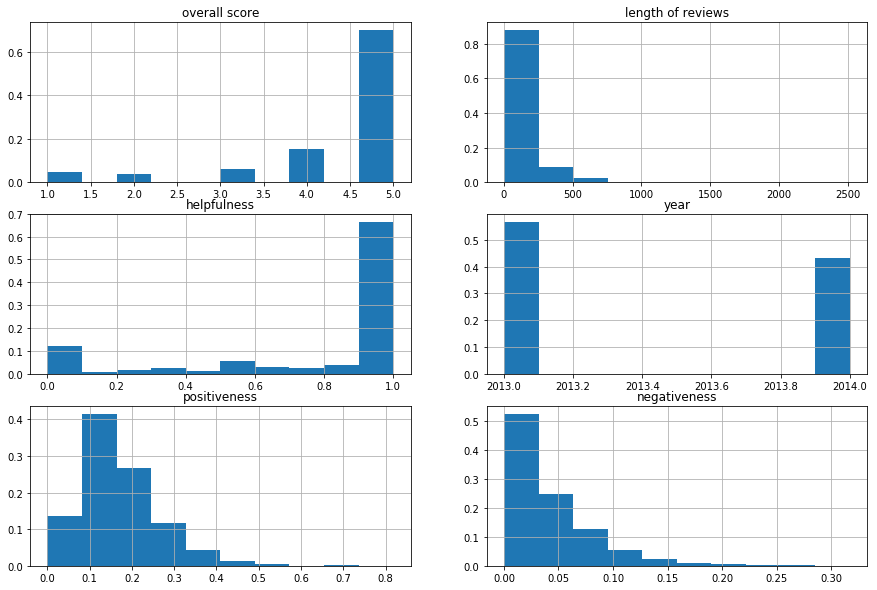

In [40]:
distribution(p)

In [41]:
cm=X.corr()
cm

,overall,helpfulness,length_review,sentiment_pos,sentiment_neg,sentiment_com
overall,1.000000,0.547928,-0.132686,0.269471,-0.345859,0.340306
helpfulness,0.547928,1.000000,0.012878,0.148100,-0.248739,0.264029
length_review,-0.132686,0.012878,1.000000,-0.243832,0.087350,0.141179
sentiment_pos,0.269471,0.148100,-0.243832,1.000000,-0.310794,0.497413
sentiment_neg,-0.345859,-0.248739,0.087350,-0.310794,1.000000,-0.592496
sentiment_com,0.340306,0.264029,0.141179,0.497413,-0.592496,1.000000


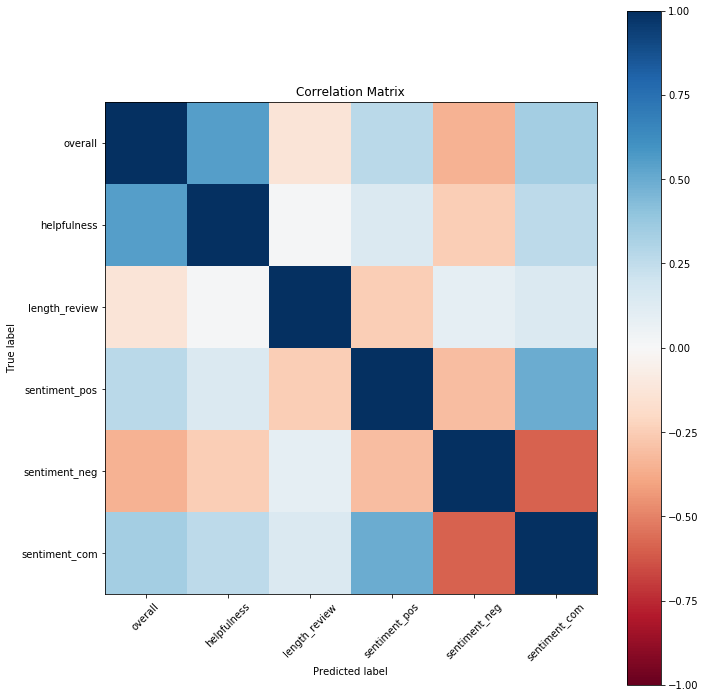

In [42]:
# Plot correlation matrix
plt.figure(figsize=(10,10))
plot_correlation_matrix(cm, classes=X.columns,title='Correlation Matrix')
plt.show()              

In [43]:
output_notebook()
p = figure(width=1000, height=500)
p=corr('length_review','sentiment_pos','navy')
p=corr('length_review','sentiment_neg','red')
show(p)

Loading BokehJS ...

In [56]:
score=df[['sub_category_1','overall','length_review','price','sentiment_com','sentiment_pos','sentiment_neg','helpfulness']].groupby('sub_category_1').agg(['mean','std'])
score=score.iloc[[1,2,7,14]]
#['Computers & Accessories' , 'Accessories & Supplies' , 'Camera & Photo' , 'Portable Audio & Video']


Text(0.5,1,'length of the review')

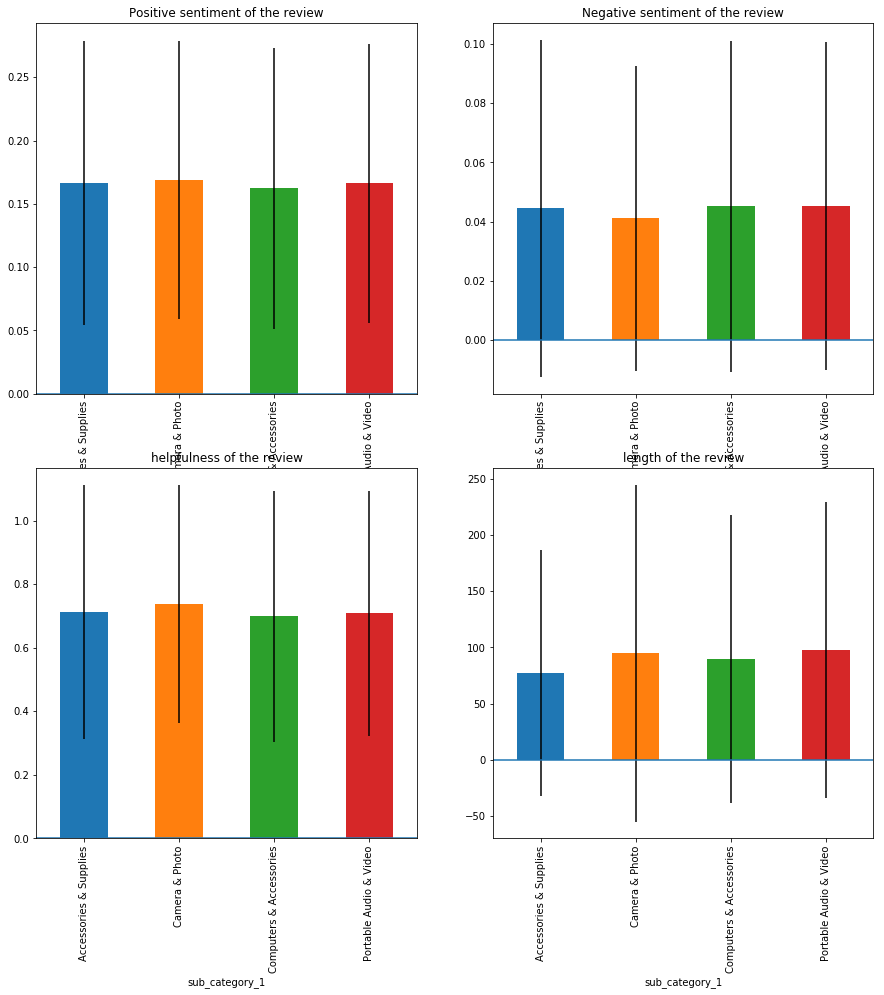

In [57]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
score['sentiment_pos']['mean'].plot.bar(yerr=score['sentiment_pos']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('Positive sentiment of the review')
plt.subplot(2,2,2)
score['sentiment_neg']['mean'].plot.bar(yerr=score['sentiment_neg']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('Negative sentiment of the review')
plt.subplot(2,2,3)
score['helpfulness']['mean'].plot.bar(yerr=score['helpfulness']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('helpfulness of the review')
plt.subplot(2,2,4)
score['length_review']['mean'].plot.bar(yerr=score['length_review']['std'])

plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('length of the review')

Text(0.5,1,'length of the review')

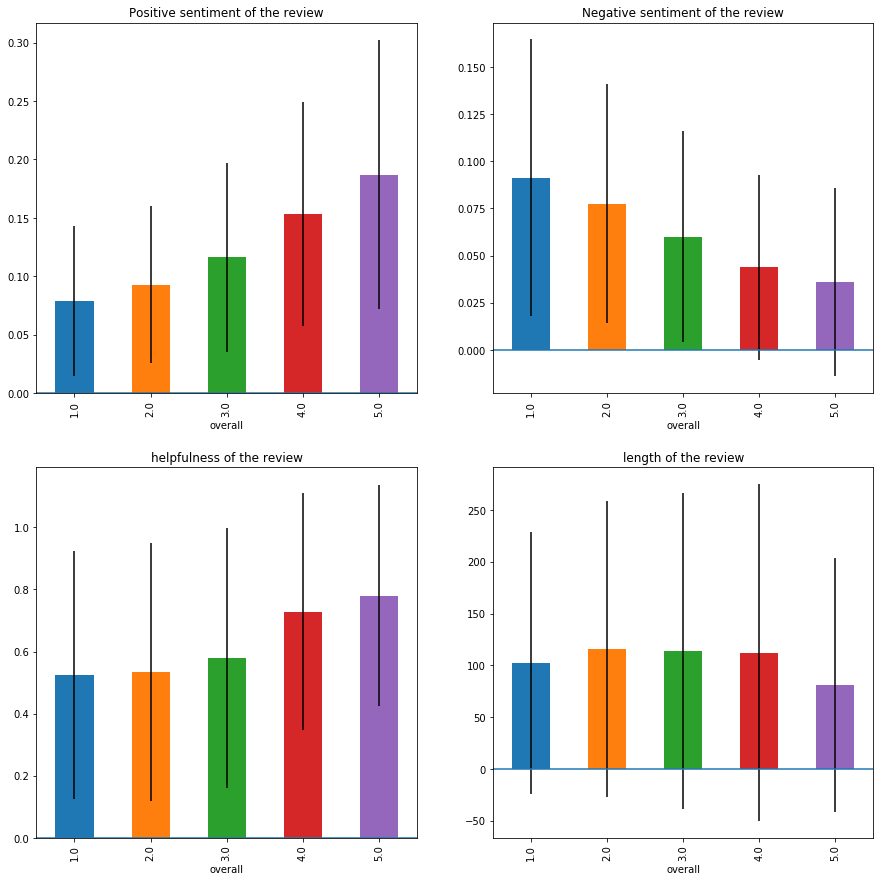

In [60]:
sc_overall=df.groupby('overall').agg(['mean','std'])
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sc_overall['sentiment_pos']['mean'].plot.bar(yerr=sc_overall['sentiment_pos']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('Positive sentiment of the review')
plt.subplot(2,2,2)
sc_overall['sentiment_neg']['mean'].plot.bar(yerr=sc_overall['sentiment_neg']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('Negative sentiment of the review')
plt.subplot(2,2,3)
sc_overall['helpfulness']['mean'].plot.bar(yerr=sc_overall['helpfulness']['std'])
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('helpfulness of the review')
plt.subplot(2,2,4)
sc_overall['length_review']['mean'].plot.bar(yerr=sc_overall['length_review']['std'])

plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('length of the review')

In [61]:
sc_overall[['length_review','price','sentiment_com','sentiment_pos','sentiment_neg','helpfulness']]

length_review                  price             sentiment_com  \
                 mean         std       mean         std          mean   
overall                                                                  
1.0        102.511572  126.395571  64.328104  110.343007     -0.029124   
2.0        115.737583  142.752261  68.094716  112.052062      0.150557   
3.0        114.149382  152.516658  65.969644  112.470586      0.351658   
4.0        112.323661  162.626005  72.095946  120.696473      0.572030   
5.0         80.966758  122.859467  68.572100  120.254833      0.636092   

                  sentiment_pos           sentiment_neg           helpfulness  \
              std          mean       std          mean       std        mean   
overall                                                                         
1.0      0.614067      0.078843  0.064108      0.091284  0.073318    0.523792   
2.0      0.614110      0.092971  0.067573      0.077406  0.063291    0.532780   
3.0      0.558847      0.116150  0.080980      0.059940  0.055913    0.578774   
4.0      0.459853      0.153260  0.095792      0.043727  0.049054    0.727934   
5.0      0.404915      0.186872  0.115253      0.036018  0.050028    0.779852   

                   
              std  
overall            
1.0      0.399108  
2.0      0.415315  
3.0      0.419631  
4.0      0.381712  
5.0      0.356328

In [65]:
X.head()

,overall,helpfulness,length_review,sentiment_pos,sentiment_neg,sentiment_com
asin,,,,,,
0594451647,5.0,1.0,22,0.163,0.000,0.5719
0594451647,2.0,NaN,22,0.000,0.139,-0.5256
0594451647,5.0,NaN,120,0.145,0.020,0.9146
0594451647,4.0,NaN,88,0.183,0.000,0.9209
0594451647,5.0,1.0,185,0.109,0.000,0.9636


Computers & Accessories
469613


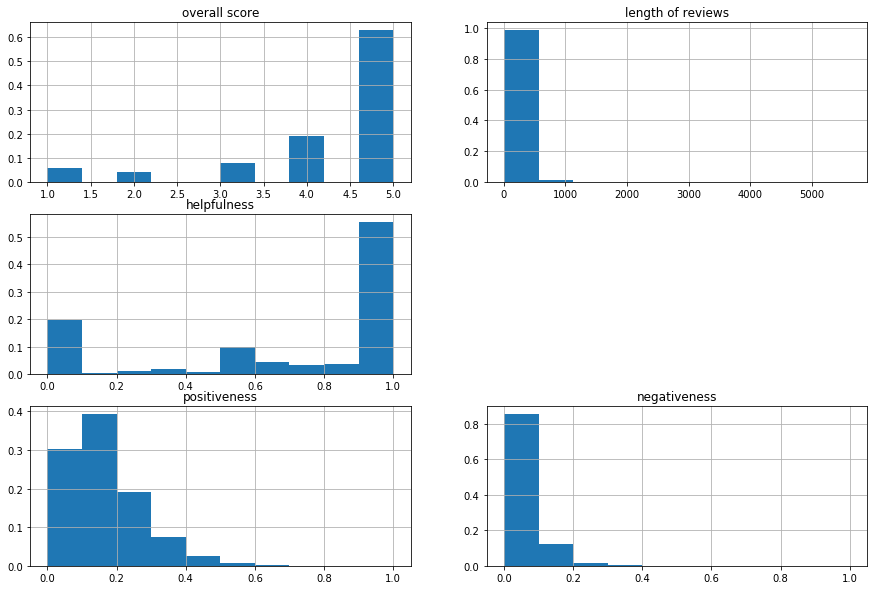

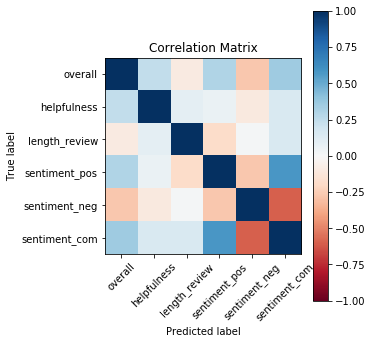

Accessories & Supplies
148451


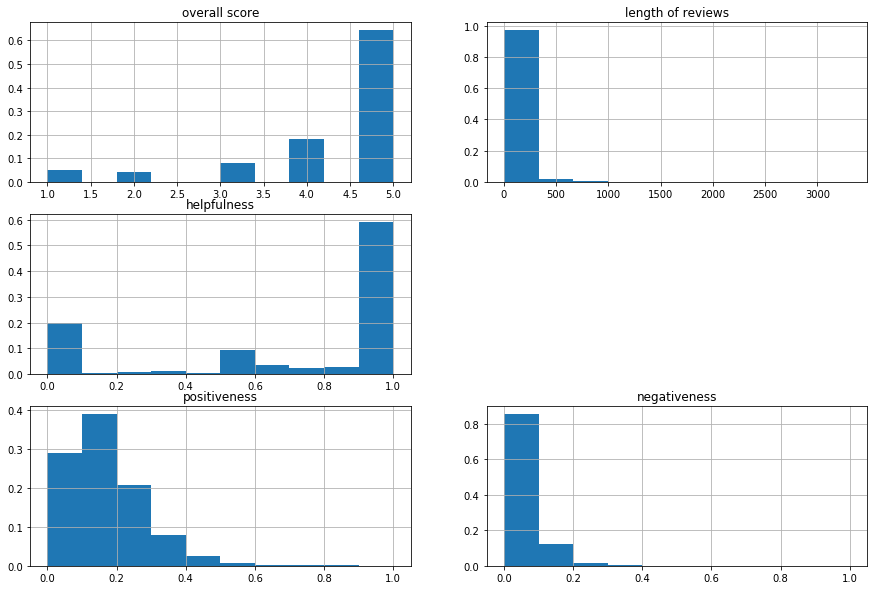

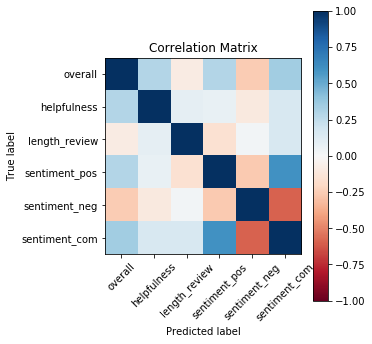

Camera & Photo
140158


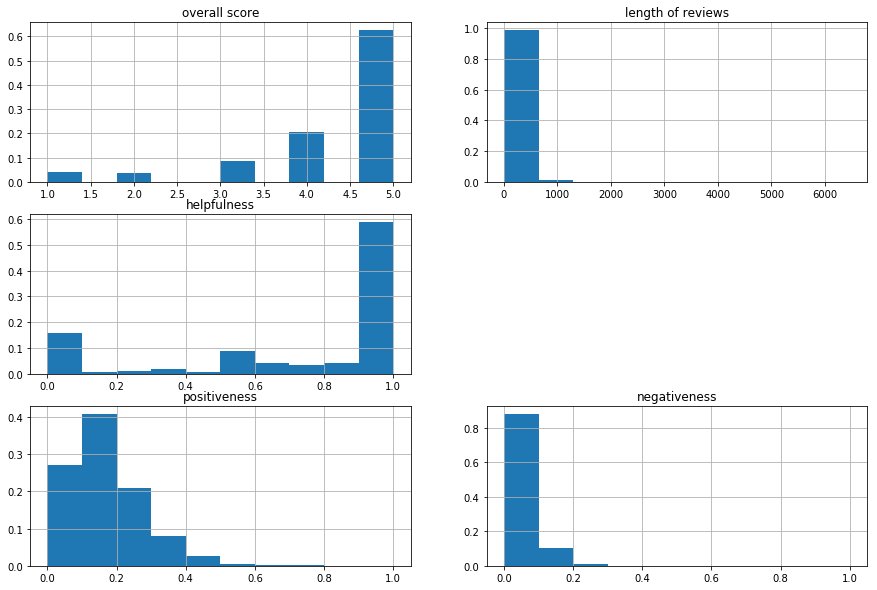

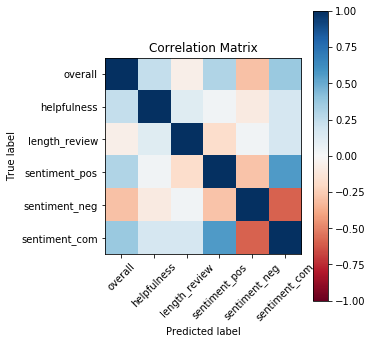

Portable Audio & Video
45025


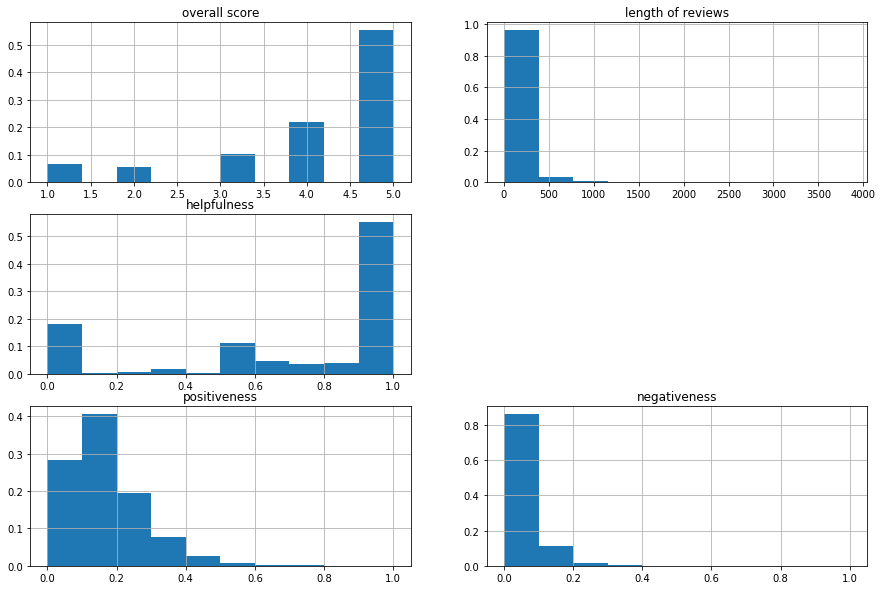

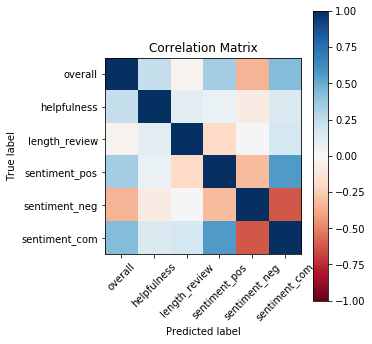

In [76]:
categories=['Computers & Accessories' , 'Accessories & Supplies' , 'Camera & Photo' , 'Portable Audio & Video']
for cat in categories:
    data=df.loc[df.sub_category_1==cat,['overall','helpfulness','length_review','sentiment_pos','sentiment_neg','sentiment_com']]
    print(cat)
    print(len(data))
    plt.figure(figsize=(15,10))   
    plt.subplot(3,2,1)
    w= np.ones_like(data['overall'])/float(len(data['overall']))
    plt.hist(data['overall'],weights=w)
    plt.title('overall score')
    plt.grid()
    
    plt.subplot(3,2,2)
    w= np.ones_like(data.length_review)/float(len(data.length_review))
    plt.hist(data['length_review'],weights=w)
    plt.grid()
    plt.title('length of reviews')
    
    plt.subplot(3,2,5)
    w= np.ones_like(data.sentiment_pos)/float(len(data.sentiment_pos))
    plt.hist(data['sentiment_pos'],weights=w)
    plt.grid()
    plt.title('positiveness')
    
    plt.subplot(3,2,6)
    w= np.ones_like(data.sentiment_neg)/float(len(data.sentiment_neg))
    plt.hist(data['sentiment_neg'],weights=w)
    plt.grid()
    plt.title('negativeness')
    
    plt.subplot(3,2,3)
    w= np.ones_like(data.helpfulness.dropna())/float(len(data.helpfulness.dropna()))
    plt.hist(data['helpfulness'].dropna(),weights=w)
    plt.grid()
    plt.title('helpfulness')
    cm=data.corr()
    #Plot correlation matrix
    plt.figure(figsize=(5,5))
    plot_correlation_matrix(cm, classes=X.columns,title='Correlation Matrix')
    plt.show()              